In [2]:
import os
os.chdir("/mnt/iusers01/jw01/mdefscs4/ra_challenge/hestia/Hestia_imeche_vision_challenge/NN_recognition_train")

In [3]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as k
import glob
from PIL import Image
import argparse
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from dataset.train_generator import retrieve_tf_dataset
from model.mobile_net_GAP import retrieve_mobilenet_model, custom_crossentropy, custom_mse

In [12]:
model = k.models.load_model("weights/step1_new_model_mobilenet.tf", custom_objects = {"custom_crossentropy": custom_crossentropy, "custom_mse": custom_mse})

In [9]:
tf_data = retrieve_tf_dataset()

In [10]:
for X,Y in tf_data.take(1):
    pass

In [13]:
model.evaluate(tf_data, steps = 10)

10/10 [==============================] - 107s 11s/step - loss: 0.0671 - presence_loss: 0.0639 - coordinates_loss: 0.0032 - presence_presence_accuracy: 0.9771


[0.06707731634378433,
 0.06391686946153641,
 0.003160446183755994,
 0.9770833253860474]

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
tf.math.truediv (TFOpLambda)    (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.math.subtract (TFOpLambda)   (None, 224, 224, 3)  0           tf.math.truediv[0][0]            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 864         tf.math.subtract[0][0]           
______________________________________________________________________________________________

In [21]:
res = model(X, training = True)

In [ ]:
res = model.predict(X)

In [31]:
res

[array([[0.99973905]], dtype=float32),
 array([[0.1788503 , 0.089504  , 0.00215574, 0.01880854]], dtype=float32)]

In [ ]:
fig, axes  = plt.subplots(4,4, figsize = (14,14))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X[i].numpy().reshape(224,224,3)/255)

    X0 = res[1][i][0] - res[1][i][2]/2
    Y0 = res[1][i][1] - res[1][i][3]/2
    # Create a Rectangle patch
    if res[0][i] > 0.5:
        rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


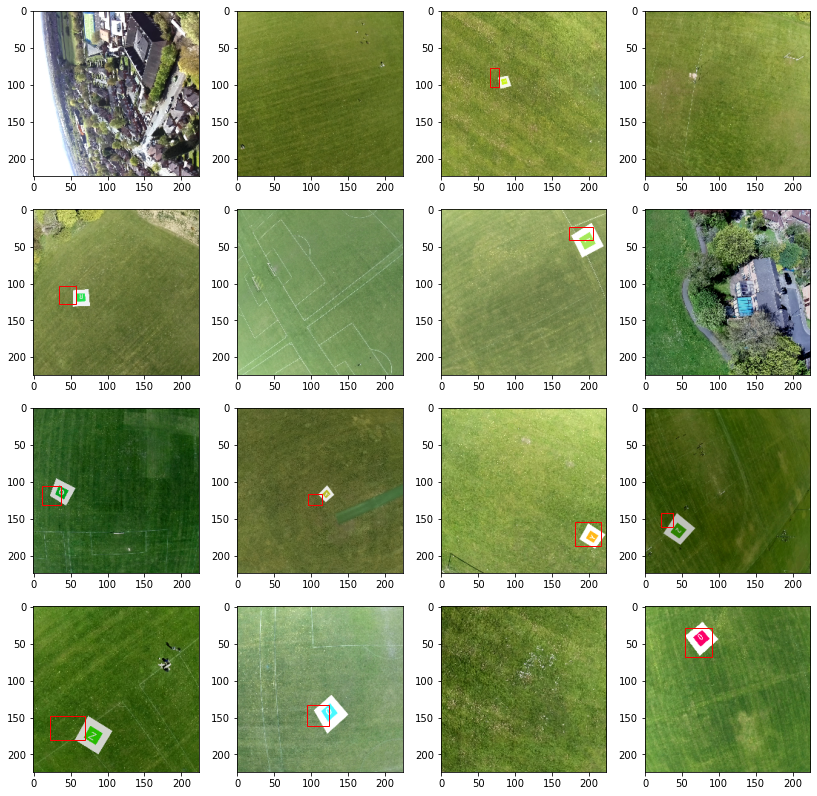

In [22]:
fig, axes  = plt.subplots(4,4, figsize = (14,14))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X[i].numpy().reshape(224,224,3)/255)

    X0 = res[1][i][0] - res[1][i][2]/2
    Y0 = res[1][i][1] - res[1][i][3]/2
    # Create a Rectangle patch
    if res[0][i] > 0.5:
        rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

In [42]:
data = np.array(Image.open("../data/ADDITIONAL/frame_birch_real_6163.jpeg").resize((224,224), 2)).reshape((1,224,224,3))

In [43]:
res = model.predict(data)

In [44]:
res

[array([[0.9998872]], dtype=float32),
 array([[0.41241252, 0.29054612, 0.06291474, 0.05128112]], dtype=float32)]

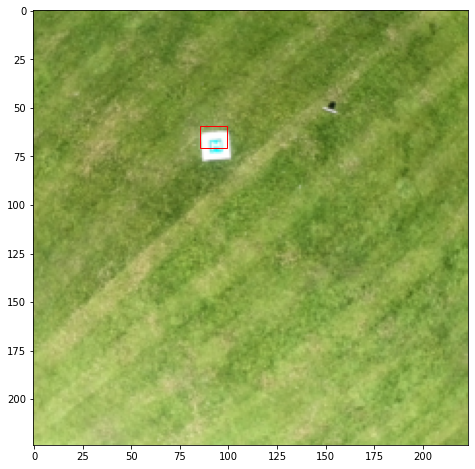

In [45]:
fig, ax  = plt.subplots(1,1, figsize = (8,8))
ax.imshow(data.reshape(224,224,3))
i = 0
X0 = res[1][i][0] - res[1][i][2]/2
Y0 = res[1][i][1] - res[1][i][3]/2
rect = patches.Rectangle((X0*224, Y0*224), res[1][i][2]*224, res[1][i][3]*224, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

In [88]:
np.argmax(res[2][0])

31

In [89]:

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [90]:
int_to_char[np.argmax(res[2][0])]

'5'

In [105]:
res

[array([[0.03776151],
        [0.03832465],
        [0.03795189],
        [0.03829223],
        [0.03849894],
        [0.04017636],
        [0.04087996],
        [0.03897199],
        [0.0394516 ],
        [0.03769431],
        [0.03948095],
        [0.03879884],
        [0.03879979],
        [0.03799945],
        [0.03983122],
        [0.03887472],
        [0.0378592 ],
        [0.04019821],
        [0.03947484],
        [0.03861406],
        [0.03826395],
        [0.03802094],
        [0.03740403],
        [0.03803691],
        [0.03857973],
        [0.03830269],
        [0.03857255],
        [0.038582  ],
        [0.03862804],
        [0.0387859 ],
        [0.03766307],
        [0.03740543]], dtype=float32),
 array([[0.5987054 , 0.71438736, 0.21054262, 0.17842564],
        [0.59878206, 0.7146095 , 0.2106705 , 0.17826553],
        [0.598698  , 0.71490675, 0.21073651, 0.17853458],
        [0.59898436, 0.7157104 , 0.21067226, 0.17863373],
        [0.59934187, 0.71576226, 0.21066451, 0.

In [45]:
Y

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
       dtype=float32)>,
 <tf.Tensor: shape=(32, 4), dtype=float32, numpy=
 array([[0.54305214, 0.39611456, 0.1423589 , 0.15163006],
        [1.010404  , 0.12204555, 0.13340922, 0.14034222],
        [0.3619167 , 0.24476467, 0.11989287, 0.11599211],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [0.74961734, 0.9900609 , 0.10359631, 0.09251148],
        [       nan,        nan,        nan,        nan],
        [0.8407317 , 0.36445338, 0.20393804, 0.19815691],
        [0.37899357, 0.69693315, 0.0882605 , 0.08664178],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,     

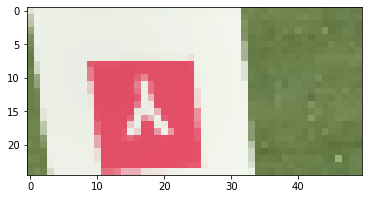

In [69]:
plt.imshow(X[2][75:100,0:50]/255)

In [73]:
res[1][2]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.04299361, 0.37054917, 0.11333504, 0.11964471], dtype=float32)>

In [80]:
np.array(sanitize(res[1][2]))*224

array([ 0.        , 24.51968688, 68.89909808, 97.10693105])

In [75]:
def sanitize(coords):
    A = np.clip(coords[0],0.01,0.99)
    B = np.clip(coords[1],0.01,0.99)
    C = np.clip(coords[2],0.1,0.7)
    D = np.clip(coords[3],0.1,0.7)
    X0 = max(A - D/1.8, 0)
    Y0 = max(B - C/1.8, 0)
    X1 = min(A + D/1.8, 1)
    Y1 = min(B + C/1.8, 1)
    return X0, X1, Y0, Y1